# College Major Analysis

## Get Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot_mpl
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

D:\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [5]:
df = pd.read_csv(r"recent-grads.csv")

In [8]:
pd.set_option('display.max_columns', 100)
df.head()

,index,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Data Preparation

### Questions about the data:
1. Accessible? -Y
2. Sizeble? -Y
3. Useble? -Y
4. Understandable? -Y
5. Readable? -Y

In [13]:
df.shape

(173, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 173 non-null    int64  
 1   Rank                  173 non-null    int64  
 2   Major_code            173 non-null    int64  
 3   Major                 173 non-null    object 
 4   Major_category        173 non-null    object 
 5   Total                 173 non-null    int64  
 6   Sample_size           173 non-null    int64  
 7   Men                   173 non-null    int64  
 8   Women                 173 non-null    int64  
 9   ShareWomen            173 non-null    float64
 10  Employed              173 non-null    int64  
 11  Full_time             173 non-null    int64  
 12  Part_time             173 non-null    int64  
 13  Full_time_year_round  173 non-null    int64  
 14  Unemployed            173 non-null    int64  
 15  Unemployment_rate     1

### Potential Problems with data:
1. High Cost - cost of labelling
2. Quality
3. Noise - Incomplete/Unaviable Data
4. Biases - Try to avoid most of them during the data collegection phase
5. Low Predictive Power
6. Outdated Example - Try to retrain the model by defining suitable percentage of data
7. Outliers
8. Data Leakage - target leakage

In [22]:
df["Men"].sum(), df["Women"].sum() # Proportion between men and women in college

(2878263, 3897752)

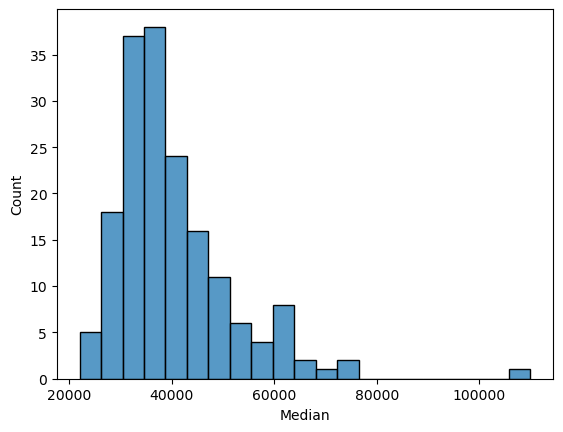

In [24]:
sns.histplot(data=df, x = "Median"); # Median Salary Distribution among college students, an outlier is indicated at the max side

In [31]:
df["Median"].idxmax(), df["Median"].idxmin()

(0, 172)

In [30]:
df.loc[0, :] # Petroleum Engineering students earn the highest median salary, it looks like an outlier

index                                       0
Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Major_category                    Engineering
Total                                    2339
Sample_size                                36
Men                                      2057
Women                                     282
ShareWomen                           0.120564
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                     

In [32]:
df.loc[172, ] # Library Science students earn the lowest median salary

index                               172
Rank                                173
Major_code                         3501
Major                   LIBRARY SCIENCE
Major_category                Education
Total                              1098
Sample_size                           2
Men                                 134
Women                               964
ShareWomen                      0.87796
Employed                            742
Full_time                           593
Part_time                           237
Full_time_year_round                410
Unemployed                           87
Unemployment_rate              0.104946
Median                            22000
P25th                             20000
P75th                             22000
College_jobs                        288
Non_college_jobs                    338
Low_wage_jobs                       192
Name: 172, dtype: object

### Data Imputation
It is not needed for this data-set which is without any NULL values

## Feature Engineering

### Look into Major Category, which will be our targeted variable

In [38]:
df["Major_category"].nunique()

16

In [41]:
list(df["Major_category"].unique())

['Engineering',
 'Business',
 'Physical Sciences',
 'Law & Public Policy',
 'Computers & Mathematics',
 'Agriculture & Natural Resources',
 'Industrial Arts & Consumer Services',
 'Arts',
 'Health',
 'Social Science',
 'Biology & Life Science',
 'Education',
 'Humanities & Liberal Arts',
 'Psychology & Social Work',
 'Communications & Journalism',
 'Interdisciplinary']

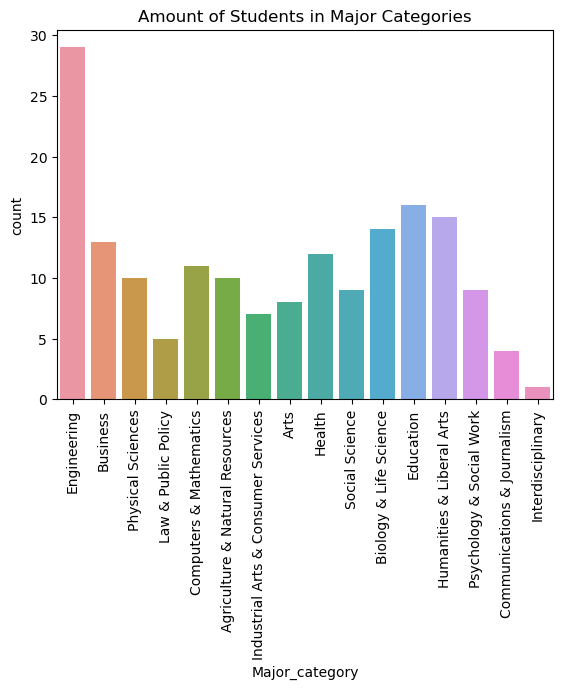

In [51]:
sns.countplot(data=df, x="Major_category")
plt.xticks(rotation=90)
plt.title("Amount of Students in Major Categories");

In [59]:
df["Major_category"].value_counts().reset_index()

,index,Major_category
0,Engineering,29
1,Education,16
2,Humanities & Liberal Arts,15
3,Biology & Life Science,14
4,Business,13
5,Health,12
6,Computers & Mathematics,11
7,Physical Sciences,10
8,Agriculture & Natural Resources,10
9,Social Science,9


In [78]:
agg = df.groupby("Major_category").mean() # Aggreate the data by major categories, calculate the mean of all quantitative variables
major_category = agg.iloc[:, 3:]
major_category.head()

,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,7998.100000,110.400000,19787.500000,24981.200000,0.617938,6694.300000,5814.300000,1659.100000,4362.600000,382.400000,0.056328,36900.000000,25400.000000,48010.000000,1986.000000,3449.100000,789.900000
Arts,44641.250000,407.500000,10847.625000,17558.625000,0.561851,36014.250000,25971.625000,14348.875000,19138.875000,3528.500000,0.090173,33062.500000,21962.500000,43662.500000,11848.125000,20465.000000,7514.500000
Biology & Life Science,32418.714286,165.500000,30557.357143,41295.142857,0.584518,21628.357143,17169.785714,8338.285714,11843.000000,1632.428571,0.060918,36421.428571,26614.285714,46085.714286,10802.357143,9084.428571,3053.000000
Business,100182.769231,1192.692308,13609.000000,8489.769231,0.405063,83749.384615,76066.923077,15148.923077,60801.923077,6144.384615,0.071064,43538.461538,33461.538462,54846.153846,11426.000000,38197.692308,9752.923077
Communications & Journalism,98150.250000,1127.000000,9173.000000,24569.500000,0.643835,82665.000000,68332.500000,22454.250000,53557.000000,6713.000000,0.075538,34500.000000,26250.000000,44975.000000,21639.000000,43248.000000,12398.750000


In [79]:
major_category["Total"].sort_values(ascending=False)

Major_category
Business                               100182.769231
Communications & Journalism             98150.250000
Social Science                          58885.111111
Psychology & Social Work                53445.222222
Humanities & Liberal Arts               47564.533333
Arts                                    44641.250000
Health                                  38602.500000
Law & Public Policy                     35821.400000
Education                               34945.562500
Industrial Arts & Consumer Services     32827.428571
Biology & Life Science                  32418.714286
Computers & Mathematics                 27182.545455
Physical Sciences                       18547.900000
Engineering                             18537.344828
Interdisciplinary                       12296.000000
Agriculture & Natural Resources          7998.100000
Name: Total, dtype: float64

In [80]:
major_category["Median"].sort_values(ascending=False)

Major_category
Engineering                            57382.758621
Business                               43538.461538
Computers & Mathematics                42745.454545
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Social Science                         37344.444444
Agriculture & Natural Resources        36900.000000
Health                                 36825.000000
Biology & Life Science                 36421.428571
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Communications & Journalism            34500.000000
Arts                                   33062.500000
Education                              32350.000000
Humanities & Liberal Arts              31913.333333
Psychology & Social Work               30100.000000
Name: Median, dtype: float64

If considering the median salary of PETROLEUM ENGINEERING students is an outlier

In [81]:
df_temp = df[1: ]
major_category_NOPET = df_temp.groupby("Major_category").mean().iloc[:, 3:]
major_category_NOPET["Median"].sort_values(ascending=False) # The Engineering majors' median salary is still the highest

Major_category
Engineering                            55503.571429
Business                               43538.461538
Computers & Mathematics                42745.454545
Law & Public Policy                    42200.000000
Physical Sciences                      41890.000000
Social Science                         37344.444444
Agriculture & Natural Resources        36900.000000
Health                                 36825.000000
Biology & Life Science                 36421.428571
Industrial Arts & Consumer Services    36342.857143
Interdisciplinary                      35000.000000
Communications & Journalism            34500.000000
Arts                                   33062.500000
Education                              32350.000000
Humanities & Liberal Arts              31913.333333
Psychology & Social Work               30100.000000
Name: Median, dtype: float64

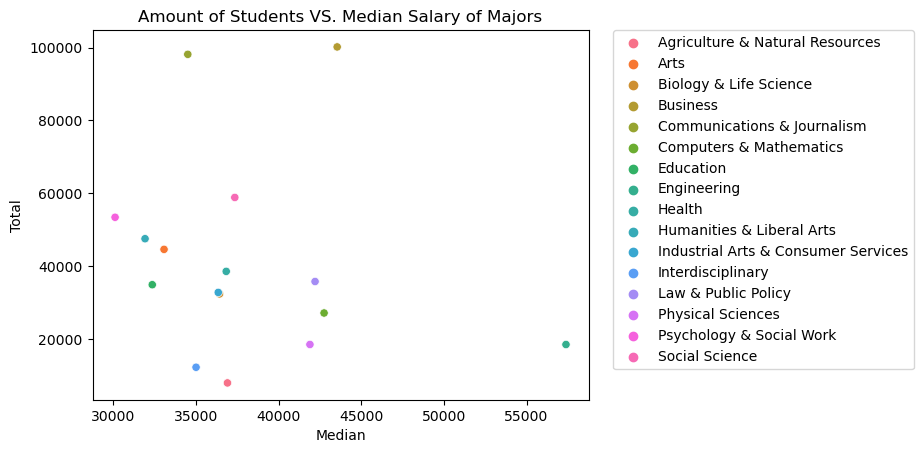

In [87]:
sns.scatterplot(data=major_category, x="Median", y="Total", hue="Major_category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Amount of Students VS. Median Salary of Majors");

In [88]:
df.describe()

,index,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,87.000000,3879.815029,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,50.084928,1687.753140,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,0.000000,1.000000,1100.000000,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,43.000000,44.000000,2403.000000,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050723,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,86.000000,87.000000,3608.000000,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068272,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,129.000000,130.000000,5503.000000,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087599,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,172.000000,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [90]:
df.sample(10)

,index,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
131,131,132,4007,INTERDISCIPLINARY SOCIAL SCIENCES,Social Science,9916,95,13487,35004,0.721866,7444,5843,2834,4714,757,0.092306,33000,24000,40000,2630,3906,1470
153,153,154,6003,VISUAL AND PERFORMING ARTS,Arts,16250,132,2013,4639,0.697384,12870,8447,6253,6322,1465,0.102197,30000,22000,40000,3849,7635,2840
162,162,163,5502,ANTHROPOLOGY AND ARCHEOLOGY,Humanities & Liberal Arts,38844,247,1167,36422,0.968954,29633,20147,14515,13232,3395,0.102792,28000,20000,38000,9805,16693,6866
37,37,38,6205,BUSINESS ECONOMICS,Business,13302,199,3477,1154,0.249190,10914,10048,1937,8000,1165,0.096448,46000,33000,58000,1578,4612,1284
108,108,109,3611,NEUROSCIENCE,Biology & Life Science,13663,53,80231,72593,0.475010,9087,8027,3078,5482,463,0.048482,35000,30000,44000,5605,2301,902
65,65,66,2599,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,8804,125,124,0,0.000000,7502,7001,1240,5825,416,0.052539,40000,30400,56000,2446,3896,386
111,111,112,1302,FORESTRY,Agriculture & Natural Resources,3607,48,32041,71439,0.690365,3007,2473,891,1763,322,0.096726,35000,28600,48000,1096,1692,327
94,94,95,5301,CRIMINAL JUSTICE AND FIRE PROTECTION,Law & Public Policy,152824,1728,3156,451,0.125035,125393,109970,32242,88548,11268,0.082452,35000,26000,45000,24348,88858,18404
160,160,161,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,10510,117,18616,11591,0.383719,8650,7662,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
133,133,134,2309,SECONDARY TEACHER EDUCATION,Education,17125,156,6820,10305,0.601752,15116,12520,3782,9193,833,0.052229,32500,25000,38000,10304,3967,1385
